In [3]:
%matplotlib inline
import moviepy.editor
import numpy as np
import matplotlib.pyplot as plt

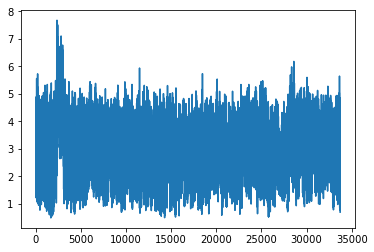

In [19]:
framerate=10
clip = moviepy.editor.VideoFileClip("sample.mp4")
cut = lambda i: clip.audio.subclip(1.0*i/framerate,1.0*(i+1)/framerate).to_soundarray(fps=22000)
volume = lambda array: np.sqrt(((1.0*array)**2).mean())

volumes = [volume(cut(i)) for i in range(0,framerate*int(clip.duration))]
amp_volumes=[i*100 for i in volumes]
plt.plot(amp_volumes)

In [5]:
len(amp_volumes)

33720

In [6]:
print(amp_volumes)

[2.0967011451197353, 4.1400000044994743, 4.4913018106451812, 3.4196108764733668, 2.0713087288175203, 2.8425756533357025, 3.1361157793424583, 4.2563447283592479, 2.9727565885499749, 1.9651872015026999, 4.6168394498088006, 1.778122182324603, 4.0081809584516277, 1.3053597871061422, 2.618772477862001, 2.2016821867397058, 2.8295357828633358, 3.2680323641474578, 4.0707062911478316, 3.1062048685667376, 3.2054368992373439, 1.2422985615779436, 1.9896832848213359, 2.8859581074588614, 3.7777501406970915, 3.062799857030222, 1.7788564879487225, 2.7239408341715619, 2.1257898853245289, 1.6295703843726819, 1.4568569488831489, 1.642886246231982, 2.898100840016046, 3.62574635353785, 1.7665982029504528, 3.5657129338678346, 3.9070007381317122, 2.6616081838462815, 2.877893935254169, 4.0739013079141388, 2.9650594772832948, 1.6644361816966196, 1.3465981757423051, 1.2166096279158201, 2.498195078601495, 3.1551357777502336, 3.9512756831933298, 2.6925667209759063, 3.1113480389246351, 3.1473402049735824, 3.284577

In [7]:
clip.duration

3372.09

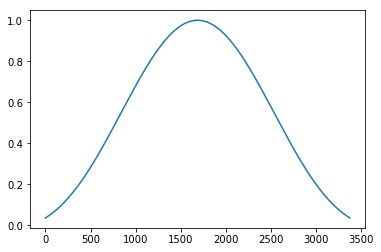

In [8]:
kaiser_func=np.kaiser(int(clip.duration),5)
plt.plot(kaiser_func)

In [9]:
sound_unscaled = np.convolve(kaiser_func/kaiser_func.sum(),amp_volumes,mode='same')
#maxv1=max(sound_unscaled)
#soundnew=100*sound_unscaled*(1-(sum(sound_unscaled)/maxv1)/len(sound_unscaled))/maxv1

In [10]:
len(sound_unscaled)
max_val=max(sound_unscaled) 
#scaling the values between 0 to 100
sound_activity= sound_unscaled*100/max_val

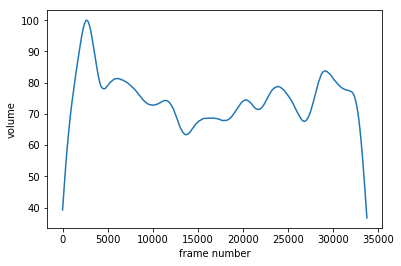

In [21]:
plt.plot(sound_activity)
plt.xlabel('frame number')
plt.ylabel('volume')

In [12]:
print(sound_activity)

[ 39.2433945   39.28507578  39.3275621  ...,  36.77463353  36.73373214
  36.69264025]


In [13]:
len(sound_activity)

33720

In [18]:
def get_filtered_peaks(smooth_curve):
    #find peaks from the curve
    increases = np.diff(smooth_curve)[:-1]>=0
    decreases = np.diff(smooth_curve)[1:]<=0
    peaks_position = (increases * decreases).nonzero()[0]
    #print (peaks_position)
    peaks_value = smooth_curve[peaks_position]
    peaks_position = peaks_position[peaks_value>np.percentile(peaks_value,70)]
    
    #filter two close (5 seconds apart) peaks
    final_peaks_position=[peaks_position[0]]
    for fr_num in peaks_position:
        if (fr_num - final_peaks_position[-1]) < 200:
            if smooth_curve[fr_num] > smooth_curve[final_peaks_position[-1]]:
                final_peaks_position[-1] = fr_num
        else:
            final_peaks_position.append(fr_num)

    #final_times = [i for i in final_peaks_position]
    return final_peaks_position
    

final_cuts_times = get_filtered_peaks(sound_activity)
print(final_cuts_times)

#final = moviepy.editor.concatenate([clip.subclip(max(t-5,0),min(t+5, clip.duration))
#                     for t in final_cuts_times])
#final.to_videofile('soccer_summary.mp4')

[2680, 4512, 6135, 6446, 6657, 6913, 7154, 23903, 24104, 29071, 31144, 31375, 31585, 31886]
